# An example of using EASYMORE to extract data for point data, in this case capitals of the world
## Source netCDF file are ERA5 limited to North American Domain and Caribbean domain
## In this example, we initialize easymore using a configuration dictionary

In [1]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

config     = {'case_name'   : 'ERA5_capitals_north_america',
              'temp_dir'    : './temporary/',
              'target_shp'  : './data/target_shapefiles/Capitals_point.shp', # all the world capitals
              'source_nc'   : './data/Source_nc_ERA5/ERA5_NA_*.nc', # ERA5 limited to North America and Caribbean
              'var_names'   : ['airtemp'],
              'var_lon'     : 'longitude',
              'var_lat'     : 'latitude',
              'var_time'    : 'time',
              'output_dir'  : './output/'}
esmr.init_from_dict(config)

# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 1.0.0 is initiated.
no author name is provided. The author name is changed to (author name)!
EASYMORE will remap variable  airtemp  from source file to variable  airtemp  in remapped netCDF file
EASYMORE detects that the variables from the netCDF files are identicalin dimensions of the variables and latitude and longitude
EASYMORE detects that all the variables have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude variables has dimensions of:
['longitude']
EASYMORE detects that the latitude variables has dimensions of:
['latitude']
--CREATING-REMAPPING-FILE--
Started at date and time 2023-04-19 20:19:29.555707
EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shape

--------------
--------------
# Visualization of the source and the results

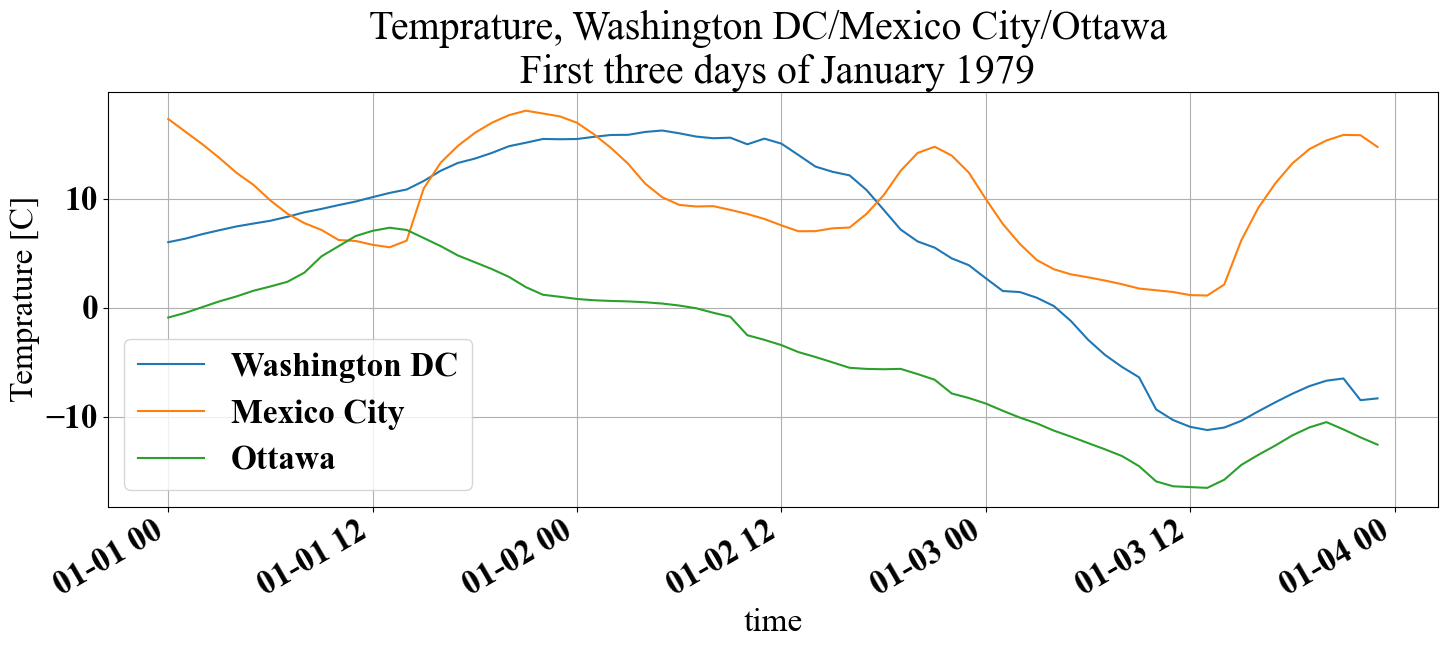

In [2]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

shp = gpd.read_file( esmr.temp_dir + esmr.case_name + '_intersected_shapefile.shp')
#print(shp)

# the intersected shapefile shows that the ID_t of Washington, D.C., Ottawa and Mexico City is 187, 102 and 192 meaning that
# they corresponse to the ID of 187 and 192 in the original shapefile of the capitals of the world
# many of the capitals are not in the intersection as the ERA5 data is limited to North America and Caribbean


# merge the output file into one xarray dataset
ds = xr.merge([xr.open_dataset(f) for f in sorted(glob.glob(esmr.output_dir+esmr.case_name +'*.nc'))])
#print(ds)
ds.airtemp [:,:] = ds.airtemp[:,:] - 273; # Kelvin to Celsius

# extract the data and plotting
fig, axes = plt.subplots(1,1,figsize=(15,7), facecolor='white')

WashingtonDC = ds.sel(ID=187, method = 'nearest') # ID_t, the target ID for Washington DC is 187
WashingtonDC.airtemp.plot(ax = axes, label='Washington DC')

MexicoCity = ds.sel(ID=192, method = 'nearest') # ID_t, the target ID for Mexico City is 192
MexicoCity.airtemp.plot(ax = axes, label='Mexico City')

Ottawa = ds.sel(ID=102, method = 'nearest') # ID_t, the target ID for Ottawa DC is 102
Ottawa.airtemp.plot(ax = axes, label='Ottawa')

plt.grid()
plt.ylabel ('Temprature [C]')
plt.title ('Temprature, Washington DC/Mexico City/Ottawa \n First three days of January 1979')
plt.legend()
plt.tight_layout()
plt.savefig('./fig/ERA5_North_America_Capitals.png')
